# Assignment 2: Build a CNN for image recognition.

## Due Date:  March 29, 11:59PM

### Name: [Your-Name?]


## Introduction:

1. In this assignment, you will build Convolutional Neural Network to classify CIFAR-10 Images.
2. You can directly load dataset from many deep learning packages.
3. You can use any deep learning packages such as pytorch, keras or tensorflow for this assignment.

## Requirements:

1. You need to load cifar 10 data and split the entire training dataset into training and validation.
2. You will implement a CNN model to classify cifar 10 images with provided structure.
3. You need to plot the training and validation accuracy or loss obtained from above step.
4. Then you can use tuned parameters to train using the entire training dataset.
5. You should report the testing accuracy using the model with complete data.
6. You may try to change the structure (e.g, add BN layer or dropout layer,...) and analyze your findings.

## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

## Batch Normalization (BN)

### Background:

- Batch Normalization is a technique to speed up training and help make the model more stable.
- In simple words, batch normalization is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

- For more detailed information, you may refer to the original paper: https://arxiv.org/pdf/1502.03167.pdf.

### BN Algorithm:

- Input: Values of $x$ over a mini-batch: $\mathbf{B}$ = $\{x_1,..., x_m\};$
- Output: $\{y_i = BN_{\gamma,\beta}(x_i)\}$, $\gamma, \beta$ are learnable parameters

Normalization of the Input:
$$\mu_{\mathbf{B}} = \frac{1}{m}\sum_{i=1}^m x_i$$
$$\sigma_{\mathbf{B}}^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \mu_{\mathbf{B}})^2$$
$$\hat{x_i} = \frac{x_i - \mu_{\mathbf{B}}}{\sqrt{\sigma_{\mathbf{B}}}^2 + \epsilon}$$
Re-scaling and Offsetting:
$$y_i = \gamma \hat{x_i} + \beta = BN_{\gamma,\beta}(x_i)$$


### Advantages of BN:
1. Improves gradient flow through the network.
2. Allows use of saturating nonlinearities and higher learning rates.
3. Makes weights easier to initialize.
4. Act as a form of regularization and may reduce the need for dropout.

### Implementation:

- The batch normalization layer has already been implemented in many packages. You may simply call the function to build the layer. For example: torch.nn.BatchNorm2d() using pytroch package, keras.layers.BatchNormalization() using keras package.
- The location of BN layer: Please make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

## 1. Data preparation

### 1.1. Load data


In [2]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=ec1c02fc5956d445fca7a9ec32915db1434b0ff0e880668796bc15bf540b9885
  Stored in directory: c:\users\vapat\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


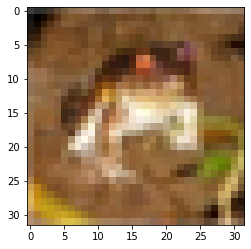

In [3]:
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### If you can not load keras dataset, un-comment these two lines.
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

plt.imshow(x_train[0])
plt.show()



### 1.2. One-hot encode the labels (5 points)

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Implement a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [4]:
def to_one_hot(y, num_class=10):
    result = np.zeros((y.shape[0], 10))
    for i, j in enumerate(y):
      result[i][j] = 1
    return result

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets (5 points)

Randomly partition the 50K training samples to 2 sets: 
* a training set containing 40K samples: x_tr, y_tr
* a validation set containing 10K samples: x_val, y_val


In [5]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train_vec, train_size=0.8, test_size=0.2, random_state=0)

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters (50 points)

- Build a convolutional neural network model using the below structure:

- It should have a structure of: Conv - ReLU - Max Pool - ConV - ReLU - Max Pool - Dense - ReLU - Dense - Softmax

- In the graph 3@32x32 means the dimension of input image, 32@30x30 means it has 32 filters and the dimension now becomes 30x30 after the convolution.
- All convolutional layers (Conv) should have stride = 1 and no padding.
- Max Pooling has a pool size of 2 by 2.




<img src="network.PNG"/>

- You may use the validation data to tune the hyper-parameters (e.g., learning rate, and optimization algorithm)
- Do NOT use test data for hyper-parameter tuning!!!
- Try to achieve a validation accuracy as high as possible.

In [6]:
# Build the model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (4, 4)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [7]:
# Define model optimizer and loss function
import tensorflow
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adadelta(), metrics=["acc"])

In [8]:
# Train the model and store model parameters/loss values

model1 = model.fit(x_tr, y_tr, batch_size=16, epochs=200, validation_data=(x_val, y_val)) 

Epoch 1/200
2500/2500 [==============================] - 26s 4ms/step - loss: 17.1324 - acc: 0.1221 - val_loss: 9.9859 - val_acc: 0.16491s - loss: 18.2478 - ETA: 0s - loss: - ETA: 0s - loss: 17.4177
Epoch 2/200
2500/2500 [==============================] - 9s 4ms/step - loss: 8.5930 - acc: 0.1910 - val_loss: 7.5899 - val_acc: 0.2084
Epoch 3/200
2500/2500 [==============================] - 7s 3ms/step - loss: 6.9625 - acc: 0.2197 - val_loss: 6.5077 - val_acc: 0.2294
Epoch 4/200
2500/2500 [==============================] - 7s 3ms/step - loss: 6.0940 - acc: 0.2391 - val_loss: 5.8413 - val_acc: 0.2432
Epoch 5/200
2500/2500 [==============================] - 6s 3ms/step - loss: 5.5302 - acc: 0.2528 - val_loss: 5.3827 - val_acc: 0.2539
Epoch 6/200
2500/2500 [==============================] - 6s 3ms/step - loss: 5.1148 - acc: 0.2627 - val_loss: 5.0261 - val_acc: 0.2626
Epoch 7/200
2500/2500 [==============================] - 6s 3ms/step - loss: 4.7875 - acc: 0.2727 - val_loss: 4.7354 - val_acc

Epoch 61/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.6937 - acc: 0.4871 - val_loss: 1.8796 - val_acc: 0.4527
Epoch 62/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.6807 - acc: 0.4891 - val_loss: 1.8676 - val_acc: 0.4596
Epoch 63/200
2500/2500 [==============================] - 6s 3ms/step - loss: 1.6680 - acc: 0.4909 - val_loss: 1.8503 - val_acc: 0.4572
Epoch 64/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.6556 - acc: 0.4949 - val_loss: 1.8393 - val_acc: 0.4619
Epoch 65/200
2500/2500 [==============================] - 6s 3ms/step - loss: 1.6434 - acc: 0.4967 - val_loss: 1.8278 - val_acc: 0.4600
Epoch 66/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.6316 - acc: 0.4998 - val_loss: 1.8200 - val_acc: 0.4631
Epoch 67/200
2500/2500 [==============================] - 6s 3ms/step - loss: 1.6201 - acc: 0.5004 - val_loss: 1.8099 - val_acc: 0.4669
Epoch 68/200
2500/2500 [========================

2500/2500 [==============================] - 7s 3ms/step - loss: 1.2460 - acc: 0.5890 - val_loss: 1.4981 - val_acc: 0.5247
Epoch 122/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.2415 - acc: 0.5896 - val_loss: 1.4939 - val_acc: 0.5246
Epoch 123/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.2366 - acc: 0.5917 - val_loss: 1.4920 - val_acc: 0.5236
Epoch 124/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.2331 - acc: 0.5925 - val_loss: 1.4883 - val_acc: 0.5257
Epoch 125/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.2283 - acc: 0.5932 - val_loss: 1.4854 - val_acc: 0.5249
Epoch 126/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.2239 - acc: 0.5950 - val_loss: 1.4820 - val_acc: 0.5250
Epoch 127/200
2500/2500 [==============================] - 8s 3ms/step - loss: 1.2204 - acc: 0.5948 - val_loss: 1.4788 - val_acc: 0.5254
Epoch 128/200
2500/2500 [==============================

Epoch 181/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0441 - acc: 0.6493 - val_loss: 1.3587 - val_acc: 0.5537
Epoch 182/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0414 - acc: 0.6520 - val_loss: 1.3568 - val_acc: 0.5580
Epoch 183/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0388 - acc: 0.6514 - val_loss: 1.3591 - val_acc: 0.5567
Epoch 184/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0366 - acc: 0.6512 - val_loss: 1.3525 - val_acc: 0.5586
Epoch 185/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0338 - acc: 0.6539 - val_loss: 1.3575 - val_acc: 0.5563
Epoch 186/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0315 - acc: 0.6539 - val_loss: 1.3498 - val_acc: 0.5571
Epoch 187/200
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0291 - acc: 0.6564 - val_loss: 1.3489 - val_acc: 0.5587
Epoch 188/200
2500/2500 [================

## 3. Plot the training and validation loss curve versus epochs. (5 points)

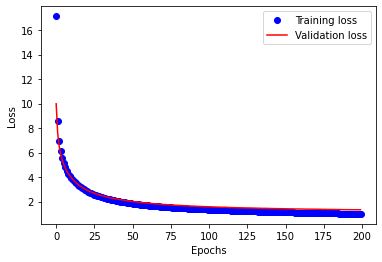

In [9]:
# Plot the loss curve
plt.plot(range(len(model1.history["loss"])), model1.history["loss"], "bo", label="Training loss")
plt.plot(range(len(model1.history["val_loss"])), model1.history["val_loss"], "r", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 4. Train (again) and evaluate the model (5 points)

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [10]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adadelta(), metrics=["acc"])

In [11]:
#<Train your model on the entire training set (50K samples)>
model1 = model.fit(x_train, y_train_vec, batch_size=16, epochs=200, validation_data=(x_val, y_val)) 

Epoch 1/200
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0635 - acc: 0.6462 - val_loss: 1.3205 - val_acc: 0.5653
Epoch 2/200
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0593 - acc: 0.6462 - val_loss: 1.3117 - val_acc: 0.5696
Epoch 3/200
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0554 - acc: 0.6492 - val_loss: 1.3062 - val_acc: 0.5696
Epoch 4/200
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0525 - acc: 0.6497 - val_loss: 1.2948 - val_acc: 0.5731
Epoch 5/200
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0495 - acc: 0.6499 - val_loss: 1.2902 - val_acc: 0.5750
Epoch 6/200
3125/3125 [==============================] - 8s 3ms/step - loss: 1.0465 - acc: 0.6527 - val_loss: 1.2806 - val_acc: 0.5764
Epoch 7/200
3125/3125 [==============================] - 8s 3ms/step - loss: 1.0430 - acc: 0.6529 - val_loss: 1.2786 - val_acc: 0.5740
Epoch 8/200
3125/3125 [==============================] 

3125/3125 [==============================] - 9s 3ms/step - loss: 0.9168 - acc: 0.6921 - val_loss: 1.0649 - val_acc: 0.6406
Epoch 62/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9153 - acc: 0.6922 - val_loss: 1.0612 - val_acc: 0.6402
Epoch 63/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9134 - acc: 0.6931 - val_loss: 1.0563 - val_acc: 0.6446
Epoch 64/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9117 - acc: 0.6938 - val_loss: 1.0542 - val_acc: 0.6427
Epoch 65/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9100 - acc: 0.6938 - val_loss: 1.0545 - val_acc: 0.6415
Epoch 66/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9080 - acc: 0.6945 - val_loss: 1.0527 - val_acc: 0.6419
Epoch 67/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9064 - acc: 0.6959 - val_loss: 1.0483 - val_acc: 0.6460
Epoch 68/200
3125/3125 [==============================] - 9s 

3125/3125 [==============================] - 8s 3ms/step - loss: 0.8204 - acc: 0.7246 - val_loss: 0.9214 - val_acc: 0.6867
Epoch 122/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8184 - acc: 0.7259 - val_loss: 0.9284 - val_acc: 0.6827
Epoch 123/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8171 - acc: 0.7258 - val_loss: 0.9167 - val_acc: 0.6893
Epoch 124/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8156 - acc: 0.7274 - val_loss: 0.9199 - val_acc: 0.6862
Epoch 125/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.8144 - acc: 0.7262 - val_loss: 0.9171 - val_acc: 0.6889
Epoch 126/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.8129 - acc: 0.7274 - val_loss: 0.9112 - val_acc: 0.6905
Epoch 127/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8120 - acc: 0.7280 - val_loss: 0.9108 - val_acc: 0.6903
Epoch 128/200
3125/3125 [==============================

Epoch 181/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.7454 - acc: 0.7514 - val_loss: 0.8222 - val_acc: 0.7225
Epoch 182/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.7447 - acc: 0.7523 - val_loss: 0.8209 - val_acc: 0.7225
Epoch 183/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.7434 - acc: 0.7521 - val_loss: 0.8237 - val_acc: 0.7216
Epoch 184/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.7420 - acc: 0.7520 - val_loss: 0.8228 - val_acc: 0.7220
Epoch 185/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.7408 - acc: 0.7537 - val_loss: 0.8161 - val_acc: 0.7248
Epoch 186/200
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7396 - acc: 0.7533 - val_loss: 0.8132 - val_acc: 0.7270
Epoch 187/200
3125/3125 [==============================] - 8s 3ms/step - loss: 0.7390 - acc: 0.7542 - val_loss: 0.8171 - val_acc: 0.7218
Epoch 188/200
3125/3125 [================

## 5. Evaluate the model on the test set (5 points)

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [12]:
# Evaluate your model performance (testing accuracy) on testing data.
performance = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(performance[0]))
print('accuracy = ' + str(performance[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.1767 - acc: 0.6224
loss = 1.1767102479934692
accuracy = 0.6223999857902527


## 6. Building model with new structure (25 points)
- In this section, you can build your model with adding new layers (e.g, BN layer or dropout layer, ...).
- If you want to regularize a ```Conv/Dense layer```, you should place a ```Dropout layer``` before the ```Conv/Dense layer```.
- You can try to compare their loss curve and testing accuracy and analyze your findings.
- You need to try at lease two different model structures.

In [22]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(64, (4, 4)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(2, 2))

model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        32832     
_________________________________________________________________
activation_7 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)             

In [25]:
model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Nadam(), metrics=["acc"])

In [26]:
history1 = model2.fit(x_tr, y_tr, batch_size=32, epochs=150, validation_data=(x_val, y_val)) 

Epoch 1/150
1250/1250 [==============================] - 8s 5ms/step - loss: 2.3539 - acc: 0.1159 - val_loss: 2.3075 - val_acc: 0.1156
Epoch 2/150
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2744 - acc: 0.1289 - val_loss: 2.1453 - val_acc: 0.2046
Epoch 3/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9017 - acc: 0.2959 - val_loss: 1.6767 - val_acc: 0.3987
Epoch 4/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6740 - acc: 0.3846 - val_loss: 1.5485 - val_acc: 0.4381
Epoch 5/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5759 - acc: 0.4263 - val_loss: 1.4560 - val_acc: 0.4754
Epoch 6/150
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4972 - acc: 0.4598 - val_loss: 1.4416 - val_acc: 0.4735
Epoch 7/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4403 - acc: 0.4864 - val_loss: 1.3589 - val_acc: 0.5042
Epoch 8/150
1250/1250 [==============================] 

1250/1250 [==============================] - 7s 5ms/step - loss: 0.7438 - acc: 0.7572 - val_loss: 1.0787 - val_acc: 0.6593
Epoch 62/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7411 - acc: 0.7569 - val_loss: 1.0985 - val_acc: 0.6553
Epoch 63/150
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7406 - acc: 0.7599 - val_loss: 1.0980 - val_acc: 0.6571
Epoch 64/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7320 - acc: 0.7627 - val_loss: 1.1297 - val_acc: 0.6488
Epoch 65/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7237 - acc: 0.7645 - val_loss: 1.1230 - val_acc: 0.6552
Epoch 66/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7226 - acc: 0.7637 - val_loss: 1.1021 - val_acc: 0.6513
Epoch 67/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7190 - acc: 0.7654 - val_loss: 1.0764 - val_acc: 0.6663
Epoch 68/150
1250/1250 [==============================] - 7s 

1250/1250 [==============================] - 7s 5ms/step - loss: 0.6437 - acc: 0.8025 - val_loss: 1.1847 - val_acc: 0.6585
Epoch 122/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6510 - acc: 0.8001 - val_loss: 1.1432 - val_acc: 0.6639
Epoch 123/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6469 - acc: 0.8008 - val_loss: 1.1612 - val_acc: 0.6527
Epoch 124/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6336 - acc: 0.8056 - val_loss: 1.1970 - val_acc: 0.6542
Epoch 125/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6666 - acc: 0.7981 - val_loss: 1.2804 - val_acc: 0.6239
Epoch 126/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6448 - acc: 0.8028 - val_loss: 1.2113 - val_acc: 0.6534
Epoch 127/150
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6242 - acc: 0.8059 - val_loss: 1.2243 - val_acc: 0.6520
Epoch 128/150
1250/1250 [==============================

In [27]:
model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Nadam(), metrics=["acc"])

In [28]:
history1 = model2.fit(x_train, y_train_vec, batch_size=32, epochs=150, validation_data=(x_val, y_val)) 

Epoch 1/150
1563/1563 [==============================] - 11s 6ms/step - loss: 0.9088 - acc: 0.7419 - val_loss: 1.0484 - val_acc: 0.6510
Epoch 2/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8731 - acc: 0.7415 - val_loss: 0.9358 - val_acc: 0.6873
Epoch 3/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8420 - acc: 0.7496 - val_loss: 0.9140 - val_acc: 0.6932
Epoch 4/150
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8113 - acc: 0.7571 - val_loss: 0.9047 - val_acc: 0.6980
Epoch 5/150
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8147 - acc: 0.7560 - val_loss: 0.9159 - val_acc: 0.6934
Epoch 6/150
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8204 - acc: 0.7522 - val_loss: 0.8058 - val_acc: 0.7349
Epoch 7/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8019 - acc: 0.7602 - val_loss: 0.8004 - val_acc: 0.7287
Epoch 8/150
1563/1563 [============================

1563/1563 [==============================] - 9s 6ms/step - loss: 0.7508 - acc: 0.7761 - val_loss: 0.6675 - val_acc: 0.7837
Epoch 62/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7623 - acc: 0.7757 - val_loss: 0.5465 - val_acc: 0.8256
Epoch 63/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7645 - acc: 0.7721 - val_loss: 0.5678 - val_acc: 0.8196
Epoch 64/150
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7893 - acc: 0.7640 - val_loss: 0.5704 - val_acc: 0.8105
Epoch 65/150
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7626 - acc: 0.7738 - val_loss: 0.5612 - val_acc: 0.8199
Epoch 66/150
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7507 - acc: 0.7770 - val_loss: 0.5428 - val_acc: 0.8216
Epoch 67/150
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7613 - acc: 0.7740 - val_loss: 0.6016 - val_acc: 0.8090
Epoch 68/150
1563/1563 [==============================] -

1563/1563 [==============================] - 9s 6ms/step - loss: 0.8623 - acc: 0.7494 - val_loss: 0.5743 - val_acc: 0.8140
Epoch 122/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8104 - acc: 0.7656 - val_loss: 0.5792 - val_acc: 0.8108
Epoch 123/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8869 - acc: 0.7417 - val_loss: 0.5315 - val_acc: 0.8266
Epoch 124/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9079 - acc: 0.7405 - val_loss: 0.6406 - val_acc: 0.7920
Epoch 125/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8454 - acc: 0.7537 - val_loss: 0.7183 - val_acc: 0.7588
Epoch 126/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8277 - acc: 0.7572 - val_loss: 0.5888 - val_acc: 0.8157
Epoch 127/150
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8534 - acc: 0.7522 - val_loss: 0.5324 - val_acc: 0.8356
Epoch 128/150
1563/1563 [==============================

In [29]:
# Evaluate your model performance (testing accuracy) on testing data.
performance = model2.evaluate(x_test, y_test_vec)
print('loss = ' + str(performance[0]))
print('accuracy = ' + str(performance[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.2757 - acc: 0.6397
loss = 1.2757397890090942
accuracy = 0.6396999955177307


In [31]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(2, 2))

model3.add(Dropout(0.2))
model3.add(Conv2D(64, (4, 4)))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(2, 2))

model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(10, activation="softmax"))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        32832     
_________________________________________________________________
activation_11 (Activation)   (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)         

In [32]:
model3.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adamax(), metrics=["acc"])

In [33]:
history2 = model3.fit(x_tr, y_tr, batch_size=256, epochs=50, validation_data=(x_val, y_val)) 

Epoch 1/50
157/157 [==============================] - 2s 11ms/step - loss: 6.7213 - acc: 0.1133 - val_loss: 2.2952 - val_acc: 0.1093
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 2.2935 - acc: 0.1217 - val_loss: 2.2820 - val_acc: 0.1170
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 2.2672 - acc: 0.1319 - val_loss: 2.2696 - val_acc: 0.1261
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 2.2325 - acc: 0.1550 - val_loss: 2.2180 - val_acc: 0.1589
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 2.1974 - acc: 0.1770 - val_loss: 2.2028 - val_acc: 0.1672
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 2.1532 - acc: 0.1909 - val_loss: 2.1545 - val_acc: 0.1819
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 2.1041 - acc: 0.2048 - val_loss: 2.1785 - val_acc: 0.1639
Epoch 8/50
157/157 [==============================] - 1s 8ms/step - loss: 2

In [34]:
model3.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adamax(), metrics=["acc"])

In [35]:
history2 = model3.fit(x_train, y_train_vec, batch_size=256, epochs=50, validation_data=(x_val, y_val)) 

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 0.8892 - acc: 0.6933 - val_loss: 0.7887 - val_acc: 0.7344
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 0.8408 - acc: 0.7073 - val_loss: 0.7634 - val_acc: 0.7407
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 0.8177 - acc: 0.7155 - val_loss: 0.7118 - val_acc: 0.7575
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 0.7955 - acc: 0.7221 - val_loss: 0.6833 - val_acc: 0.7720
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 0.7831 - acc: 0.7281 - val_loss: 0.6576 - val_acc: 0.7756
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 0.7612 - acc: 0.7322 - val_loss: 0.6248 - val_acc: 0.7942
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 0.7492 - acc: 0.7383 - val_loss: 0.6112 - val_acc: 0.8013
Epoch 8/50
196/196 [==============================] - 2s 8ms/step - loss: 0.

In [36]:
# Evaluate your model performance (testing accuracy) on testing data.
performance = model3.evaluate(x_test, y_test_vec)
print('loss = ' + str(performance[0]))
print('accuracy = ' + str(performance[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.7657 - acc: 0.7610
loss = 0.765708327293396
accuracy = 0.7609999775886536
